In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import numpy as np

torch.set_default_device("cuda")

seed = 404
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
generator = torch.Generator("cuda").manual_seed(seed)

# 1. MNIST 데이터셋 다운로드 및 전처리
transform = transforms.ToTensor()
mnist_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_size = int(0.8 * len(mnist_dataset))
val_size = len(mnist_dataset) - train_size
train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size], generator)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, generator=generator)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, generator=generator)

In [15]:
# 2. 간단한 오토인코더 모델 정의
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 모델 인스턴스화 및 손실 함수, 옵티마이저 정의
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
# 3. 일정 epoch 동안 모델 학습
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for data, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        data = data.view(-1, 28*28).cuda()
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for data, _ in val_loader:
            data = data.view(-1, 28*28).cuda()
            outputs = model(data)
            loss = criterion(outputs, data)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch 1/20: 100%|██████████| 750/750 [00:06<00:00, 111.71it/s]


Epoch [1/20], Train Loss: 0.0660, Val Loss: 0.0552


Epoch 2/20: 100%|██████████| 750/750 [00:06<00:00, 111.19it/s]


Epoch [2/20], Train Loss: 0.0497, Val Loss: 0.0436


Epoch 3/20: 100%|██████████| 750/750 [00:06<00:00, 112.62it/s]


Epoch [3/20], Train Loss: 0.0411, Val Loss: 0.0394


Epoch 4/20: 100%|██████████| 750/750 [00:06<00:00, 112.32it/s]


Epoch [4/20], Train Loss: 0.0386, Val Loss: 0.0378


Epoch 5/20: 100%|██████████| 750/750 [00:06<00:00, 108.66it/s]


Epoch [5/20], Train Loss: 0.0373, Val Loss: 0.0368


Epoch 6/20: 100%|██████████| 750/750 [00:06<00:00, 108.89it/s]


Epoch [6/20], Train Loss: 0.0364, Val Loss: 0.0361


Epoch 7/20: 100%|██████████| 750/750 [00:06<00:00, 112.33it/s]


Epoch [7/20], Train Loss: 0.0357, Val Loss: 0.0355


Epoch 8/20: 100%|██████████| 750/750 [00:06<00:00, 113.95it/s]


Epoch [8/20], Train Loss: 0.0351, Val Loss: 0.0352


Epoch 9/20: 100%|██████████| 750/750 [00:06<00:00, 113.91it/s]


Epoch [9/20], Train Loss: 0.0346, Val Loss: 0.0345


Epoch 10/20: 100%|██████████| 750/750 [00:06<00:00, 114.58it/s]


Epoch [10/20], Train Loss: 0.0342, Val Loss: 0.0343


Epoch 11/20: 100%|██████████| 750/750 [00:06<00:00, 114.07it/s]


Epoch [11/20], Train Loss: 0.0338, Val Loss: 0.0339


Epoch 12/20: 100%|██████████| 750/750 [00:06<00:00, 113.62it/s]


Epoch [12/20], Train Loss: 0.0335, Val Loss: 0.0338


Epoch 13/20: 100%|██████████| 750/750 [00:06<00:00, 114.51it/s]


Epoch [13/20], Train Loss: 0.0333, Val Loss: 0.0337


Epoch 14/20: 100%|██████████| 750/750 [00:06<00:00, 115.42it/s]


Epoch [14/20], Train Loss: 0.0331, Val Loss: 0.0332


Epoch 15/20: 100%|██████████| 750/750 [00:06<00:00, 115.27it/s]


Epoch [15/20], Train Loss: 0.0328, Val Loss: 0.0331


Epoch 16/20: 100%|██████████| 750/750 [00:06<00:00, 116.19it/s]


Epoch [16/20], Train Loss: 0.0326, Val Loss: 0.0331


Epoch 17/20: 100%|██████████| 750/750 [00:06<00:00, 116.03it/s]


Epoch [17/20], Train Loss: 0.0325, Val Loss: 0.0329


Epoch 18/20: 100%|██████████| 750/750 [00:06<00:00, 113.22it/s]


Epoch [18/20], Train Loss: 0.0323, Val Loss: 0.0327


Epoch 19/20: 100%|██████████| 750/750 [00:06<00:00, 114.06it/s]


Epoch [19/20], Train Loss: 0.0322, Val Loss: 0.0326


Epoch 20/20: 100%|██████████| 750/750 [00:06<00:00, 115.19it/s]


Epoch [20/20], Train Loss: 0.0320, Val Loss: 0.0324


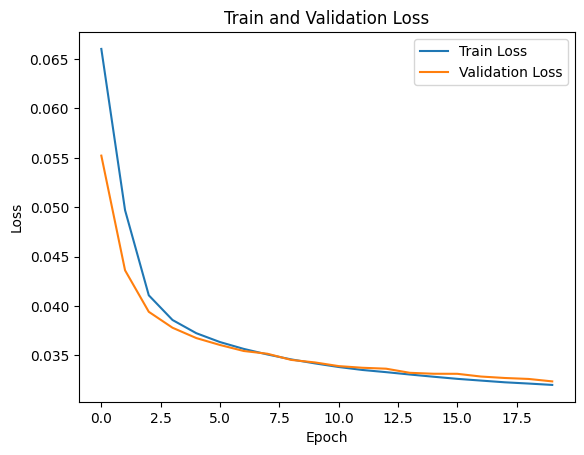

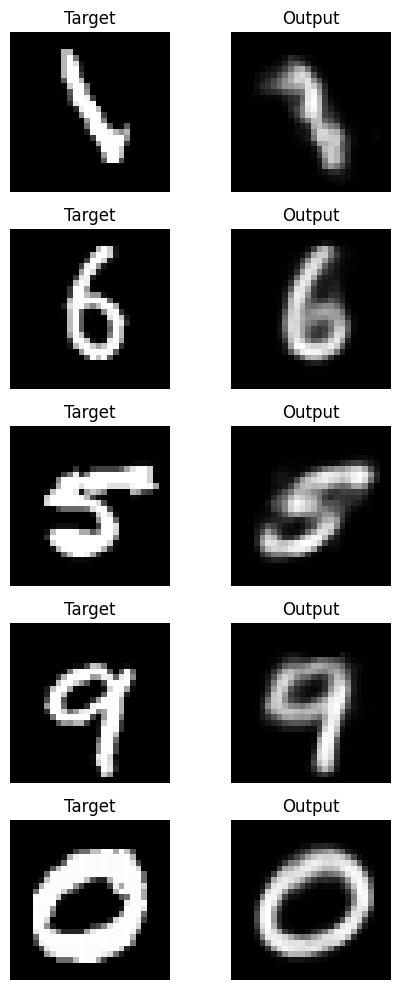

In [18]:
# 4. 학습 종료 후 에러 그래프 시각화
plt.figure()
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()

# 5. Validation set에서 5개의 데이터를 추출하여 오토인코딩 결과 시각화
model.eval()
with torch.no_grad():
    data_iter = iter(val_loader)
    data, _ = next(data_iter)
    data = data.view(-1, 28*28).cuda()
    outputs = model(data)
    
    fig, axes = plt.subplots(5, 2, figsize=(5, 10))
    for i in range(5):
        axes[i, 0].imshow(data[i].view(28, 28).cpu().numpy(), cmap='gray')
        axes[i, 0].set_title('Target')
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(outputs[i].view(28, 28).cpu().numpy(), cmap='gray')
        axes[i, 1].set_title('Output')
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()
